# Image Compression Model(Lossy Compression)

In [1]:
!pip install scikit-image

In [17]:
#Import the important libraries
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import pickle
import io as io_module

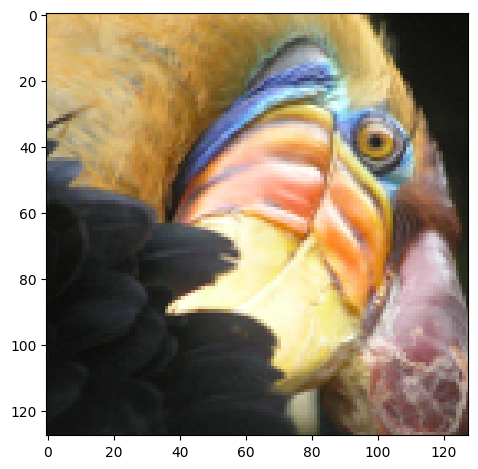

In [3]:
#Load the image
image1 = io.imread('images/bird_small.png')
io.imshow(image1)
io.show()

In [4]:
#The image that is seen above is of the shape (row,column,3), a 3-Dimentional Array. For application of K-means to perform
#image compression we need to convert this 3d representation to 2d representation (row*colum,3). Note, row*column will 
#the total number of pixels the image has. 3 in both the representations, stores the RGB values of the pixels. When k-mean
#will be applied on the 2d data, it will form clusters on the basis of the RGB of the pixels

#Dimension of the original image
rows = image1.shape[0]
cols = image1.shape[1]

#Flatten the image
image = image1.reshape(rows*cols, 3)

In [5]:
#3d representation
image1[0]

array([[219, 180, 103],
       [230, 185, 116],
       [226, 186, 110],
       [223, 185, 105],
       [225, 179, 103],
       [228, 187, 115],
       [228, 185, 111],
       [228, 187, 114],
       [225, 183, 107],
       [218, 172,  96],
       [221, 180, 102],
       [226, 187, 109],
       [222, 182,  99],
       [224, 184,  99],
       [231, 188, 100],
       [228, 182,  98],
       [222, 176,  95],
       [228, 187, 106],
       [231, 191, 103],
       [230, 182,  99],
       [224, 182, 100],
       [218, 186, 101],
       [221, 185, 107],
       [224, 184, 106],
       [224, 180, 102],
       [223, 182, 105],
       [222, 181,  99],
       [222, 175,  91],
       [223, 176,  97],
       [227, 183, 116],
       [224, 188, 122],
       [229, 193, 126],
       [227, 190, 119],
       [229, 189, 115],
       [239, 194, 113],
       [234, 192, 116],
       [227, 187, 105],
       [231, 192, 104],
       [230, 187, 108],
       [220, 183,  97],
       [225, 175,  88],
       [231, 178

In [6]:
#2d representation
image[0]

array([219, 180, 103], dtype=uint8)

In [7]:
#Implement k-means clustering to form k clusters
#When k-mean will be applied on the 2d data, it will form clusters on the basis of the RGB of the pixels irrespective 
#of which row and which coloum do they belong
kmeans = KMeans(n_clusters=16)
kmeans.fit(image)

KMeans(n_clusters=16)

In [16]:
with open('model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

Now I would like to draw your attention to 2 entities connected to K-mean scikit implementation.
1) model.cluster_centers_

2) model.labels_

In [8]:
#model.cluster_centers_: When K clusters are formed, K centroids are formed. This keywork stores these centroids.
centroids=kmeans.cluster_centers_
centroids

array([[ 47.03588808,  45.86861314,  43.52372263],
       [211.028     , 176.966     , 112.98266667],
       [237.14785992, 197.73022049, 130.23994812],
       [110.84615385,  80.89884089,  54.89989463],
       [ 22.45457201,  24.2836693 ,  21.72947707],
       [167.17634409, 149.39784946, 136.40860215],
       [187.2956778 , 147.28094303,  80.49410609],
       [247.89988751, 242.94600675, 213.82564679],
       [ 98.32      , 116.12727273, 162.72363636],
       [144.92635659, 182.6627907 , 220.20155039],
       [247.86577869, 224.74385246, 173.35860656],
       [160.18181818, 115.1540404 ,  48.55934343],
       [234.62242991, 149.1046729 ,  68.58130841],
       [207.37444279, 186.27340267, 183.0089153 ],
       [136.46386719, 113.53515625, 100.45996094],
       [ 74.70839065,  74.00825309,  78.68638239]])

In [9]:
#model.labels_:Stores the index of centroids assigned to each datapoint
labels=kmeans.labels_
labels

array([1, 2, 1, ..., 0, 0, 0])

In [10]:
#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]

In [11]:
#Convert the compressed image array to unsigned 8-bit integer data type (uint8), ensuring values are between
#0 and 255 (valid for representing pixel intensities).
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

In [12]:
#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

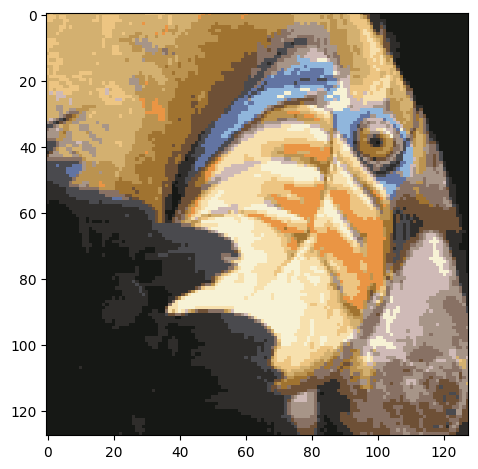

In [13]:
#Save and display output image
io.imsave('compressed_image_64.png', compressed_image)
io.imshow(compressed_image)
io.show()